# Illustration of AR sectors for definition

In [1]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Change path to working script directory
current_path=os.getcwd()
print(current_path)
major_path = current_path+"/../../../"
working_path=major_path+"/my_GIT/Synthetic_Airborne_Arctic_ARs/"
src_path=working_path+"/src/"
cfg_path=working_path+"/config/"
plt_path=working_path+"/plotting/"

print(working_path)
#os.chdir(working_path)
sys.path.insert(1, os.path.join(sys.path[0], working_path))
sys.path.insert(2,src_path)
sys.path.insert(3,cfg_path)
sys.path.insert(4,plt_path)

C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\notebooks
C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\notebooks/../../..//my_GIT/Synthetic_Airborne_Arctic_ARs/


In [3]:
import flightcampaign as Campaign
import flightmapping# as RFmaps
import flight_track_creator
import data_config

Typhon module cannot be imported


In [10]:
airborne_data_importer_path=major_path+"/Work/GIT_Repository/"
print(airborne_data_importer_path)

# Config File
config_file=data_config.load_config_file(airborne_data_importer_path,"data_config_file")

analyse_all_flights=False

#
flight_dates={"North_Atlantic_Run":
              {"SRF02":"20180224",
               "SRF04":"20190319",#},
               "SRF07":"20200416",#},
               "SRF08":"20200419"
              },
              "Second_Synthetic_Study":
              {"SRF02":"20110317",
               "SRF03":"20110423",
               "SRF08":"20150314",
               "SRF09":"20160311",
               "SRF12":"20180225"
               }}
flight_tracks_dict={}
campaigns=[*flight_dates.keys()]
shifted_lat=0
shifted_lon=0
ar_of_day="SAR_internal"

campaign="Second_Synthetic_Study"
flight="SRF02"#SRF09"20150314"

C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\notebooks/../../..//Work/GIT_Repository/
C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\notebooks/../../..//Work/GIT_Repository//data_config_file.ini
Config-file C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\notebooks/../../..//Work/GIT_Repository//data_config_file.ini.ini  already exists


### Flight Track


In [11]:
import flight_track_creator
na_run=Campaign.Second_Synthetic_Study(
                             is_flight_campaign=True,
                             major_path=config_file["Data_Paths"]["campaign_path"],
                             aircraft="HALO",interested_flights=[flight],
                             instruments=["radar","radiometer","sonde"])               
cmpgn_cls=na_run

Flight_Tracker=flight_track_creator.Flighttracker(na_run,flight,
                                ar_of_day,track_type="internal",
                                shifted_lat=0,shifted_lon=0,
                                load_save_instantan=False)

halo_dict,campaign_path=Flight_Tracker.get_synthetic_flight_track(as_dict=True)        

Overall directory of campaign work is:  C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\Work\GIT_Repository/Second_Synthetic_Study/


In [12]:
if not isinstance(halo_dict,pd.DataFrame):
    halo_df,leg_df=Flight_Tracker.concat_track_dict_to_df()
else:
    halo_df=halo_dict.copy()

### IVT Field 

In [13]:
import atmospheric_rivers as AR
import gridonhalo as Grid_on_HALO
from reanalysis import ERA5,CARRA
carra_lvls_path=cmpgn_cls.campaign_path+"/data/CARRA/"
print(carra_lvls_path)    
carra=CARRA(for_flight_campaign=True,
            campaign=campaign,research_flights=None,
            carra_path=carra_lvls_path) 
        
CARRA_on_HALO=Grid_on_HALO.CARRA_on_HALO(halo_df,carra_lvls_path,
                True,campaign,config_file["Data_Paths"]["campaign_path"],
                [flight],flight_dates[campaign][flight],config_file,ar_of_day=ar_of_day,
                synthetic_flight=True,
                do_instantaneous=False)

#IVT field
CARRA_on_HALO.merge_all_files_for_given_flight()
CARRA_on_HALO.calc_ivt_from_origin_carra_ds()
# mean HALO time stamp is 17:44 so 18:00 is a good timestamp which represents iloc=2
carra_ivt=CARRA_on_HALO.carra_ivt.isel(time=2)
carra_ivt=CARRA_on_HALO.carra_ivt.isel(time=2)
carra_ivt

C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\Work\GIT_Repository/Second_Synthetic_Study//data/CARRA/
Calculate q from RH
mixing_ratio calculated
Calculate IVT from CARRA


<xarray.Dataset>
Dimensions:    (y: 989, x: 789)
Coordinates:
    time       datetime64[ns] 2011-03-17T13:00:00
    latitude   (y, x) float64 70.13 70.13 70.12 70.12 ... 67.4 67.37 67.35 67.33
    longitude  (y, x) float64 -19.41 -19.34 -19.28 -19.22 ... 64.62 64.62 64.61
Dimensions without coordinates: y, x
Data variables:
    IVT        (y, x) float64 8.22 7.732 7.624 7.686 ... 80.08 79.3 78.77 77.29
    IVT_u      (y, x) float64 4.885 4.697 4.671 4.768 ... 66.89 66.21 66.05 64.4
    IVT_v      (y, x) float64 6.612 6.142 6.026 6.029 ... 43.65 42.92 42.75
    IWV_clc    (y, x) float64 1.023 0.9456 0.9321 0.9404 ... 8.95 8.951 8.93

### IVT along HALO track


In [14]:
CARRA_on_HALO.load_or_calc_interpolated_hmp_data()
halo_carra_hmp=CARRA_on_HALO.halo_carra_hmp 
halo_carra_hmp.index=pd.DatetimeIndex(halo_carra_hmp.index)
halo_carra_hmp.name="CARRA"
halo_carra_hmp=cmpgn_cls.calc_distance_to_IVT_max(
                        halo_df,
                        halo_carra_hmp)
halo_carra_hmp["highres_Interp_IWV"]=halo_carra_hmp["Interp_IWV_clc"].values
halo_carra_hmp["highres_Interp_IVT"]=halo_carra_hmp["Interp_IVT"].values

halo_carra_hmp_dict={}
halo_carra_hmp_dict[flight]={}
halo_carra_hmp_dict[flight]["AR_internal"]=halo_carra_hmp
new_halo_dict={}
new_halo_dict[flight]=halo_dict
        

CARRA data is already interpolated


In [15]:
from atmospheric_rivers import Atmospheric_Rivers
AR_inflow,AR_outflow=Atmospheric_Rivers.locate_AR_cross_section_sectors(
                                    new_halo_dict,halo_carra_hmp_dict,flight)
# Two sondes per sector
number_of_sondes=2
sondes_selection={}
for sector in ["warm_sector","core","cold_sector"]:
    add_sonde=1
    if sector=="core":
        add_sonde=1
    sondes_selection["ind_inflow_"+sector]=np.linspace(0,AR_inflow["AR_inflow_"+sector].shape[0]-1,
                                                        num=number_of_sondes+add_sonde).astype(int)
    sondes_selection["ind_outflow_"+sector]=np.linspace(0,AR_outflow["AR_outflow_"+sector].shape[0]-1,
                                                         num=number_of_sondes+add_sonde).astype(int)
    sondes_selection["time_inflow_"+sector]=AR_inflow["AR_inflow_"+sector].index[\
                                    sondes_selection["ind_inflow_"+sector]]
    sondes_selection["time_outflow_"+sector]=AR_outflow["AR_outflow_"+sector].index[\
                                    sondes_selection["ind_outflow_"+sector]]
    sondes_selection["pos_inflow_"+sector]=AR_inflow["AR_inflow_"+sector][\
                                            ["Halo_Lat","Halo_Lon"]].loc[sondes_selection["time_inflow_"+sector]]
    sondes_selection["pos_outflow_"+sector]=AR_outflow["AR_outflow_"+sector][\
                                ["Halo_Lat","Halo_Lon"]].loc[sondes_selection["time_outflow_"+sector]]

    sondes_selection["pos_all_"+sector]=pd.concat([sondes_selection["pos_inflow_"+sector],
                                                   sondes_selection["pos_outflow_"+sector]])

#%% Loc and locate sondes for regression method            
#sondes_selection

In [16]:
#[*AR_inflow.keys()]
AR_inflow["AR_inflow"]

,Minutesofday,Halo_Lat,Halo_Lon,Interp_IWV_clc,Interp_IVT,Interp_IVT_u,Interp_IVT_v,IVT_max_distance,highres_Interp_IWV,highres_Interp_IVT
Unnamed: 0,,,,,,,,,,
2011-03-17 11:39:21,39,73.423312,20.660649,6.941101,171.699744,-70.062979,156.750130,-360750,6.941101,171.699744
2011-03-17 11:39:22,39,73.423540,20.652842,6.941101,171.699744,-70.062979,156.750130,-360500,6.941101,171.699744
2011-03-17 11:39:23,39,73.423768,20.645035,6.941101,171.699744,-70.062979,156.750130,-360250,6.941101,171.699744
2011-03-17 11:39:24,39,73.423995,20.637228,6.941101,171.699744,-70.062979,156.750130,-360000,6.941101,171.699744
2011-03-17 11:39:25,39,73.424222,20.629421,6.941101,171.699744,-70.062979,156.750130,-359750,6.941101,171.699744
...,...,...,...,...,...,...,...,...,...,...
2011-03-17 12:27:58,87,72.847044,-1.899512,11.123507,186.434979,24.507316,170.910249,368500,11.123507,186.434979
2011-03-17 12:27:59,87,72.846435,-1.906818,11.123507,186.434979,24.507316,170.910249,368750,11.123507,186.434979
2011-03-17 12:28:00,88,72.845826,-1.914123,11.066565,184.741854,26.383430,168.696847,369000,11.066565,184.741854


## Plotting

In [17]:
import matplotlib
import matplotlib.pyplot as plt

import cmasher as cmr
import cartopy.crs as ccrs

from matplotlib import gridspec
#from typhon.plots import styles
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Figure saved as: C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\notebooks/../../..//Work/Synthetic_AR_Paper/Manuscript/Paper_Plots/fig04_sector_classification_IVT_thresholds.png


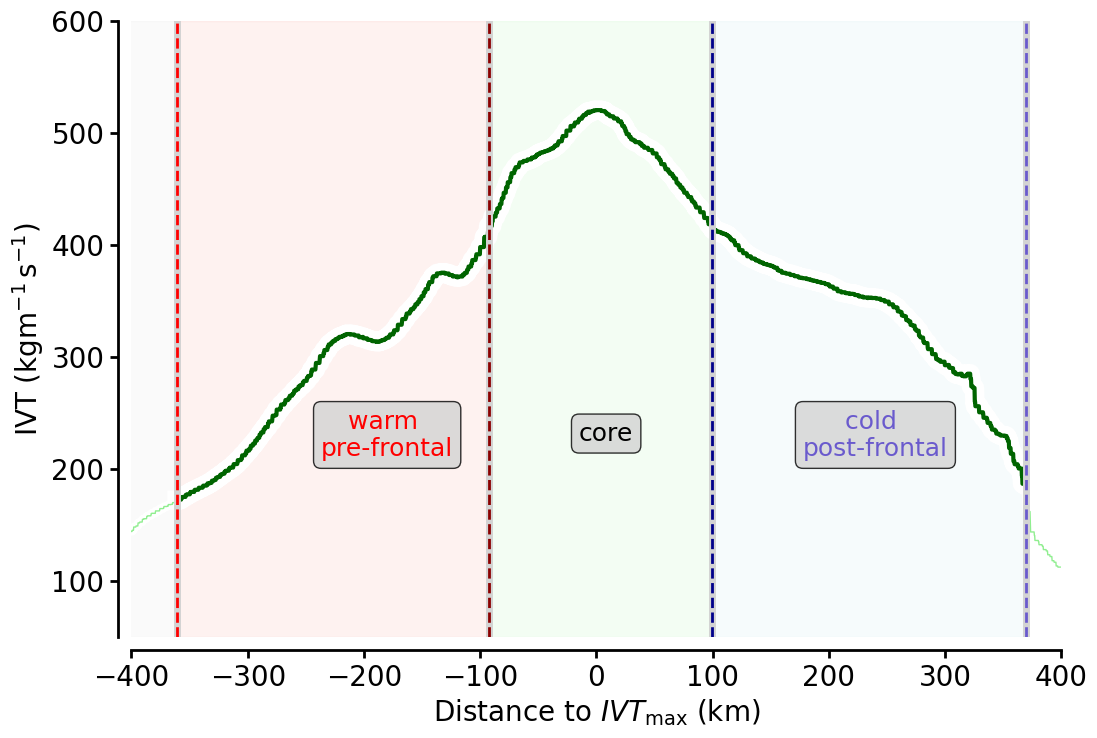

In [24]:
style_font_size=20
text_font_size=16
matplotlib.rcParams.update({"font.size":style_font_size})


sector_cross_section_fig=plt.figure(figsize=(12,8))
ax1=sector_cross_section_fig.add_subplot(111)
ax1.plot(AR_inflow["entire_inflow"]["IVT_max_distance"]/1000,AR_inflow["entire_inflow"]["highres_Interp_IVT"],lw=6,color="w")
ax1.plot(AR_inflow["AR_inflow"]["IVT_max_distance"]/1000,AR_inflow["AR_inflow"]["highres_Interp_IVT"],lw=14,color="w")
ax1.plot(AR_inflow["entire_inflow"]["IVT_max_distance"]/1000,AR_inflow["entire_inflow"]["highres_Interp_IVT"],lw=1,color="lightgreen",)
ax1.plot(AR_inflow["AR_inflow"]["IVT_max_distance"]/1000,AR_inflow["AR_inflow"]["highres_Interp_IVT"],lw=3,color="darkgreen")

# Warm sector boundaries
ax1.axvline(AR_inflow["AR_inflow_warm_sector"]["IVT_max_distance"].iloc[0]/1000,ymin=0,ymax=500,lw=5,color="lightgrey")
ax1.axvline(AR_inflow["AR_inflow_warm_sector"]["IVT_max_distance"].iloc[0]/1000,ymin=0,ymax=500,lw=2,color="red",ls="--")
ax1.axvline(AR_inflow["AR_inflow_warm_sector"]["IVT_max_distance"].iloc[-1]/1000,ymin=0,ymax=500,lw=5,color="lightgrey")
ax1.axvline(AR_inflow["AR_inflow_warm_sector"]["IVT_max_distance"].iloc[-1]/1000,ymin=0,ymax=500,lw=2,color="darkred",ls="--")
# Cold sector boundaries
ax1.axvline(AR_inflow["AR_inflow_cold_sector"]["IVT_max_distance"].iloc[0]/1000,ymin=0,ymax=500,lw=5,color="lightgrey")
ax1.axvline(AR_inflow["AR_inflow_cold_sector"]["IVT_max_distance"].iloc[0]/1000,ymin=0,ymax=500,lw=2,color="darkblue",ls="--")
ax1.axvline(AR_inflow["AR_inflow_cold_sector"]["IVT_max_distance"].iloc[-1]/1000,ymin=0,ymax=500,lw=5,color="lightgrey")
ax1.axvline(AR_inflow["AR_inflow_cold_sector"]["IVT_max_distance"].iloc[-1]/1000,ymin=0,ymax=500,lw=2,color="slateblue",ls="--")

ax1.text(-15,225,"core",bbox=dict(facecolor='lightgrey',edgecolor="k",
              boxstyle="round",alpha=0.8),fontsize=text_font_size+2)
ax1.text(240,230,"cold \npost-frontal",bbox=dict(facecolor='lightgrey',edgecolor="k",
              boxstyle="round",alpha=0.8),ha='center',color="slateblue", va='center',fontsize=text_font_size+2)
ax1.text(-180,230,"warm \npre-frontal",bbox=dict(facecolor='lightgrey',edgecolor="k",
              boxstyle="round",alpha=0.8),color="red",ha='center', va='center',fontsize=text_font_size+2)
ax1.set_xlabel("Distance to $IVT_{\mathrm{max}}$ (km)")
ax1.set_ylabel("IVT ($\mathrm{kg m}^{-1}\,\mathrm{s}^{-1}$)")
ax1.axvspan(AR_inflow["AR_inflow_warm_sector"]["IVT_max_distance"].iloc[0]/1000, 
            AR_inflow["AR_inflow_warm_sector"]["IVT_max_distance"].iloc[-1]/1000, alpha=0.1, color='salmon')
ax1.axvspan(AR_inflow["AR_inflow_cold_sector"]["IVT_max_distance"].iloc[0]/1000, 
            AR_inflow["AR_inflow_cold_sector"]["IVT_max_distance"].iloc[-1]/1000, alpha=0.1, color='lightblue')
ax1.axvspan(AR_inflow["AR_inflow_core"]["IVT_max_distance"].iloc[0]/1000, 
            AR_inflow["AR_inflow_core"]["IVT_max_distance"].iloc[-1]/1000, alpha=0.1, color='lightgreen')
ax1.axvspan(AR_inflow["entire_inflow"]["IVT_max_distance"].iloc[0]/1000, 
            AR_inflow["AR_inflow_warm_sector"]["IVT_max_distance"].iloc[0]/1000, alpha=0.1, color='lightgrey')

sns.despine(offset=10,ax=ax1)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.yaxis.set_tick_params(width=2,length=6)
    ax1.xaxis.set_tick_params(width=2,length=6)
ax1.set_ylim([50,600])
ax1.set_xlim([-400,400])
plot_path=major_path+"/Work/Synthetic_AR_Paper/Manuscript/Paper_Plots/"
fig_name="fig04_sector_classification_IVT_thresholds.png"
sector_cross_section_fig.savefig(plot_path+fig_name,dpi=300,bbox_inches="tight")
print("Figure saved as:",plot_path+fig_name)

In [19]:
AR_inflow["AR_inflow"]["highres_Interp_IVT"].max()/3

173.3520106036285

Figure saved as: C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\notebooks/../../..//Work/Synthetic_AR_Paper/Manuscript/Paper_Plots/fig04_AR_sector_illustration_20150314.png


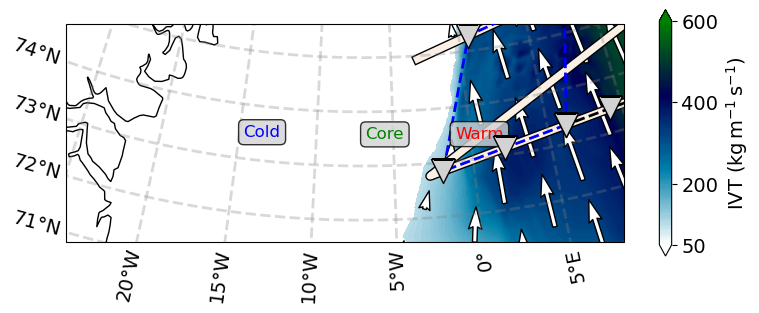

In [20]:


set_font=14
matplotlib.rcParams.update({'font.size':set_font})
# Define the plot specifications for the given variables
met_var_dict={}
met_var_dict["ERA_name"]    = {"IWV":"tcwv","IVT":"IVT"}
met_var_dict["colormap"]    = {"IWV":"density","IVT":"ocean_r"}
met_var_dict["levels"]      = {"IWV":np.linspace(10,50,51),
                               "IVT":np.linspace(50,600,61)}
met_var_dict["units"]       = {"IWV":"(kg/$\mathrm{m}^2$)",
                               "IVT":"(kg$\mathrm{m}^{-1}\mathrm{s}^{-1}$)"}

lat2=np.array(carra_ivt["latitude"][:])
lon2=np.array(carra_ivt["longitude"][:])
lower_lon=-24
lower_lat=71
upper_lon=8
upper_lat=75
# Sector specification
#with plt.style.context(styles("typhon")):

map_fig=plt.figure(figsize=(9,16))
#gs=gridspec.GridSpec(1,1,width_ratios=[1,1])
ax=plt.subplot(projection=ccrs.AzimuthalEquidistant(
                                    central_longitude=-7.0,central_latitude=72))
ax.coastlines(resolution="50m")
carra_ivt["IVT"]=carra_ivt["IVT"].where(carra_ivt["IVT"]>100)
C1=plt.contourf(lon2,lat2,carra_ivt["IVT"].values,
                        transform=ccrs.PlateCarree(),cmap=plt.get_cmap("ocean_r"),
                extend="both",levels=np.linspace(50,600,101))
import matplotlib.patheffects as pe

plt.plot(halo_df["longitude"],halo_df["latitude"],color="linen",
         lw=5,path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()],
         transform=ccrs.PlateCarree())
plt.scatter(sondes_selection["pos_all_cold_sector"]["Halo_Lon"],
            sondes_selection["pos_all_cold_sector"]["Halo_Lat"],
            marker="v",s=300,color="lightgrey",edgecolor="k",transform=ccrs.PlateCarree(),zorder=4)
plt.scatter(sondes_selection["pos_all_warm_sector"]["Halo_Lon"],
            sondes_selection["pos_all_warm_sector"]["Halo_Lat"],
            marker="v",s=300,color="lightgrey",edgecolor="k",transform=ccrs.PlateCarree(),zorder=4)
plt.scatter(sondes_selection["pos_all_core"]["Halo_Lon"],
            sondes_selection["pos_all_core"]["Halo_Lat"],
            marker="v",s=300,color="lightgrey",edgecolor="k",transform=ccrs.PlateCarree(),zorder=4)
# Warm sector rectangle
plt.plot([sondes_selection["pos_all_warm_sector"]["Halo_Lon"][0],
          sondes_selection["pos_all_warm_sector"]["Halo_Lon"][2],
          sondes_selection["pos_all_warm_sector"]["Halo_Lon"][6],
          sondes_selection["pos_all_warm_sector"]["Halo_Lon"][3],
          sondes_selection["pos_all_warm_sector"]["Halo_Lon"][0]],
         [sondes_selection["pos_all_warm_sector"]["Halo_Lat"][0],
          sondes_selection["pos_all_warm_sector"]["Halo_Lat"][2],
          sondes_selection["pos_all_warm_sector"]["Halo_Lat"][6],
          sondes_selection["pos_all_warm_sector"]["Halo_Lat"][3],
          sondes_selection["pos_all_warm_sector"]["Halo_Lat"][0]],
         color="orange",lw=2,ls="--",zorder=5,
         transform=ccrs.PlateCarree())
# Warm sector rectangle
plt.plot([sondes_selection["pos_all_cold_sector"]["Halo_Lon"][0],
          sondes_selection["pos_all_cold_sector"]["Halo_Lon"][2],
          sondes_selection["pos_all_cold_sector"]["Halo_Lon"][5],
          sondes_selection["pos_all_cold_sector"]["Halo_Lon"][3],
          sondes_selection["pos_all_cold_sector"]["Halo_Lon"][0]],
         [sondes_selection["pos_all_cold_sector"]["Halo_Lat"][0],
          sondes_selection["pos_all_cold_sector"]["Halo_Lat"][2],
          sondes_selection["pos_all_cold_sector"]["Halo_Lat"][5],
          sondes_selection["pos_all_cold_sector"]["Halo_Lat"][3],
          sondes_selection["pos_all_cold_sector"]["Halo_Lat"][0]],
         color="blue",lw=2,ls="--",zorder=3,
         transform=ccrs.PlateCarree())
plt.plot([sondes_selection["pos_all_core"]["Halo_Lon"][0],
          sondes_selection["pos_all_core"]["Halo_Lon"][2]],
          [sondes_selection["pos_all_core"]["Halo_Lat"][0],
          sondes_selection["pos_all_core"]["Halo_Lat"][2]],
          color="k",lw=2,ls="--",zorder=3,transform=ccrs.PlateCarree())
plt.plot([sondes_selection["pos_all_core"]["Halo_Lon"][3],
          sondes_selection["pos_all_core"]["Halo_Lon"][5]],
          [sondes_selection["pos_all_core"]["Halo_Lat"][3],
          sondes_selection["pos_all_core"]["Halo_Lat"][5]],
          color="k",lw=2,ls="--",zorder=3,transform=ccrs.PlateCarree())
plt.text(-1.0,73.42,"Warm",fontsize=12,color="red",
         bbox=dict(facecolor='lightgrey',edgecolor="k",
              boxstyle="round",alpha=0.8),
         transform=ccrs.PlateCarree())
plt.text(-6.8,73.5,"Core",fontsize=12,color="green",
         bbox=dict(facecolor='lightgrey',edgecolor="k",
              boxstyle="round",alpha=0.8),
         transform=ccrs.PlateCarree())
plt.text(-14.7,73.4,"Cold",fontsize=12,color="blue",
         bbox=dict(facecolor='lightgrey',edgecolor="k",
              boxstyle="round",alpha=0.8),
         transform=ccrs.PlateCarree())

cb=plt.colorbar(C1,ax=ax,shrink=0.2)
cb.set_label("IVT ($\mathrm{kg\,m}^{-1}\,\mathrm{s}^{-1}$)",fontsize=14)
cb.set_ticks([50,200,400,600])
ax.set_extent([lower_lon,upper_lon,lower_lat,upper_lat])
## Add quiver
step=45
quiver_lon=np.array(carra_ivt["longitude"][::step,::step])
quiver_lat=np.array(carra_ivt["latitude"][::step,::step])
u=np.array(carra_ivt["IVT_u"][::step,::step])
v=np.array(carra_ivt["IVT_v"][::step,::step])

v[v<50]=np.nan
quiver=ax.quiver(quiver_lon,quiver_lat,u,v,color="white",
                edgecolor="k",linewidth=1,scale=600,
                scale_units="inches",pivot="mid",
                width=0.008,transform=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=2, color='gray', alpha=0.3, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
plot_path=major_path+"/Work/Synthetic_AR_Paper/Manuscript/Paper_Plots/"
fig_name="fig04_AR_sector_illustration_20150314.png"
map_fig.savefig(plot_path+fig_name,dpi=600,bbox_inches="tight")
print("Figure saved as:",plot_path+fig_name)